<a href="https://colab.research.google.com/github/AlexandreMachineLearning/Redesneurais/blob/main/Intodu%C3%A7%C3%A3o_RNA_Celsius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [30]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.7.0'

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [32]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [33]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [34]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [35]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [36]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [37]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

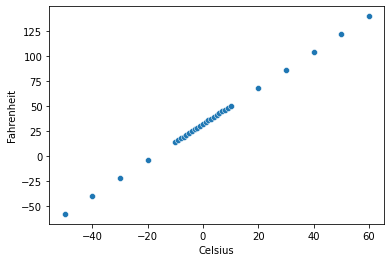

In [38]:
#sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']); atualizado 18/01/2021
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

# Etapa 4: Configuração da base de dados de treinamento

In [39]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [40]:
X_train.shape

(30,)

In [41]:
y_train.shape

(30,)

# Etapa 5: Construção e treinamento do modelo

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.05), loss = 'mean_squared_error')

In [51]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 308ms/step - loss: 0.0010
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2524
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0815
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2823
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7268
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5410
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1512
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1578
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3452
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3337
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1676
Epoch 13/1000
1/1 [===========================

# Etapa 5: Avaliação do modelo

In [52]:
epochs_hist.history.keys()

dict_keys(['loss'])

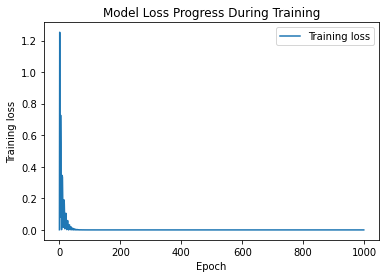

In [53]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [54]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [55]:
temp_c = 17
temp_f = model.predict([temp_c])
temp_f

array([[62.6]], dtype=float32)

In [56]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

62.6